# Lesson 0012 - MNIST Classification Decision Tree and Random Forest
We assume, that the reader has worked through the previous examples.<br>
In this lesson, we will revisit the MNIST data set from lessons [0010](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0010_mnist_classification_linear_classifier.ipynb) and [0011](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0011_mnist_classification_support_vector_machine_boosting.ipynb). This time, we will employ a decision tree and a random forest to the task of classifying the data.<br>
For the data preparation, we will steal the code from [lesson 0011](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0011_mnist_classification_support_vector_machine_boosting.ipynb), and for the learning, we will steal the code from [lesson 0008](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0008_breast_cancer_classification_decision_tree_and_random_forest.ipynb).

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

C:\Users\Robert\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
( train_x, train_y ),( test_x, test_y ) = tf.keras.datasets.mnist.load_data()

In [3]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.14.3


In [4]:
mu = np.mean( train_x )

sigma = np.std( train_x )



train_x = ( train_x - mu ) / sigma

test_x = ( test_x - mu ) / sigma

In [5]:
train_x_f = np.zeros( shape = [ 60000, 28 * 28 ] )

test_x_f = np.zeros( shape = [ 10000, 28 * 28 ] )



    

for i in range( 60000 ):
    
    dummy = np.array( train_x[ i ] )
    
    train_x_f[ i, : ] = dummy.flatten()
    
    
for i in range( 10000 ):
    
    dummy = np.array( test_x[ i ] )
    
    test_x_f[ i ] = dummy.flatten()
    
    
    
    
train_x = train_x_f

test_x = test_x_f

Now we steal the code from [lesson 0008](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0008_breast_cancer_classification_decision_tree_and_random_forest.ipynb):

In [6]:
from sklearn.tree import DecisionTreeClassifier as DTC

Seems like we forgot to print the version number of __sklearn__.

In [7]:
import sklearn

print( sklearn.__version__ )

0.19.1


We will use the decision tree algorithm __DTC__ right out of the box. We fit a model __tree__, store the predictions made by this model in __hit__, and use hit to compute the __accuracy__.

In [8]:
tree = DTC()

tree.fit( train_x, train_y )

hit = ( tree.predict( test_x ) == test_y )

accuracy = 0.0

for i in range( 10000 ):
    
    if hit[ i ]:
        
        accuracy = accuracy + 1.0
        
accuracy = accuracy / 100

print( 'We reached an accuracy of ' + str( accuracy ) + '%' )

We reached an accuracy of 88.02%


Next, we try the random forest classifier __RFC__ out of the box to fit a model __forest__. We will make predictions using __forest__ and store the results in __hit_2__ which we will use to compute the __accuracy_2__.

In [9]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [10]:
forest = RFC()

forest.fit( train_x, train_y )

hit_2 = ( forest.predict( test_x ) == test_y )

accuracy_2 = 0.0

for i in range( 10000 ):
    
    if hit_2[ i ]:
        
        accuracy_2 = accuracy_2 + 1.0
        
accuracy_2 = accuracy_2 / 100

print( 'We reached an accuracy of ' + str( accuracy_2 ) + '%' )

We reached an accuracy of 95.11%


An accuracy of $95\%$ is pretty good, but maybe, we can do better.<br>
We will try a __grid__ search for the optimal number of trees in the forest.<br>
We will vary the number of trees from $3$ to $1000$.<br>
For this grid search, we will split the __training__ data into a training set of $50000$ and a validation set of $10000$.

In [11]:
train_2_x = np.zeros( shape = [ 50000, 28 * 28 ] )

train_2_y = np.zeros( shape = [ 50000 ] )

val_2_x = np.zeros( shape = [ 10000, 28 * 28 ] )

val_2_y = np.zeros( shape = [ 10000 ] )




random_integers = np.random.choice( range( 60000 ), 50000, replace = False )

random_integers = np.sort( random_integers )



j = 0

k = 0



for i in range( 60000 ):
    
    if i == random_integers[ j ]:
        
        train_2_x[ j, : ] = train_x[ i, : ]
        
        train_2_y[ j ] = train_y[ i ]
        
        j = j + 1
        
        if j == 50000:
            
            j = 0
            
    else:
        
        val_2_x[ k, : ] = train_x[ i, : ]
        
        val_2_y[ k ] = train_y[ i ]
        
        k = k + 1

In [12]:
grid = [ 3, 5, 10, 25, 50, 75, 100, 150, 200, 250, 350, 500, 750, 1000 ]

grid_val = []

for i in range( len( grid ) ):
    
    forest_2 = RFC( n_estimators = grid[ i ] )
    
    forest_2.fit( train_2_x, train_2_y )

    hit_3 = ( forest_2.predict( val_2_x ) == val_2_y )

    accuracy_3 = 0.0

    for i in range( 10000 ):
    
        if hit_3[ i ]:
        
            accuracy_3 = accuracy_3 + 1.0
        
    accuracy_3 = accuracy_3 / 100
    
    grid_val.append( accuracy_3 )

Now, we import the __matplotlib__, print the version number and plot __grid_val__.

In [13]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

2.2.2


Text(0,0.5,'Accuracy (%)')

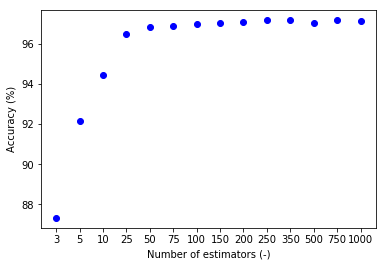

In [14]:
plt.plot( grid_val, 'bo' )

plt.xticks( range( len( grid ) ), grid )

plt.xlabel( 'Number of estimators (-)' )

plt.ylabel( 'Accuracy (%)' ) 

Seems like $100$ estimators might be a good choice. Let's train __forest_3__ with $100$ estimators and evaluate its performance.

In [15]:
forest_3 = RFC( n_estimators = 100 )
    
forest_3.fit( train_x, train_y )

hit_4 = ( forest_3.predict( test_x ) == test_y )

accuracy_4 = 0.0

for i in range( 10000 ):
    
    if hit_4[ i ]:
        
        accuracy_4 = accuracy_4 + 1.0
        
accuracy_4 = accuracy_4 / 100

print( 'We reached an accuracy of ' + str( accuracy_4 ) + '%' )

We reached an accuracy of 96.92%


We reached an accuracy of almost $97\%$. So, we are a little worse than the [support vector machine](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0011_mnist_classification_support_vector_machine_boosting.ipynb), but still pretty good.<br>
Class dismissed.